# Beauty and the Labour Market

#### Name: Shruti Rao
#### Student ID: 20455421

The aim of this assignment is to investigate the relationship between a person's physical attractiveness and their economic success.

## Research Question and Hypothesis:
This research questions if beauty influences a person's economic success''

Null Hypothesis H<sub>o</sub>: Higher beauty implies higher hourly wages

Alternate Hypothesis H<sub>a</sub>: Higher beauty does not imply higer hourly wages

## Data Description:

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from IPython.display import HTML, display
%matplotlib inline
sns.set()

The dataset is loaded in and the variables are examined.

In [2]:
file_path = './beauty and the labor market.csv'
data = pd.read_csv(file_path)
data.head()

,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ,Nservice,Slooks
0,5.73,1.745715,0,1,30,4,0,1,0,1,1,0,0,1,1,900,14,0,4
1,4.28,1.453953,0,0,28,3,0,1,0,1,1,1,0,1,0,784,12,1,0
2,7.96,2.074429,0,1,35,4,0,1,0,1,0,0,0,1,0,1225,10,1,0
3,11.57,2.448416,0,0,38,3,0,1,0,0,1,0,1,0,1,1444,16,0,3
4,11.42,2.435366,0,0,27,3,0,1,0,0,1,0,0,1,0,729,16,1,0


 ### Data Source (from Assignment)
19xx Quality of American Life survey (QAL) contains interviews of 1260 respondents. The dataset contains usual labor-market and demographic variables of interest to economists. Most importantly, it contains information on the respondents’ look. In this survey, the interviewer, who visited the respondent in his or her abode, had to rate the respondent’s physical appearance on a five-point scale, along which looks rang from homely to strikingly handsome or beautiful. Because we are interested in investigating the relationship between one’s look and income. It is essential to have a dataset that have information on both productivity-enhancing characteristics (such as education level, working experiences, etc.) and one’s physical attractiveness level.  However, in the dataset, we do not have detailed information on the respondent’s occupation. The only information we know is that if the respondent is in service industry!

In [3]:
# getting an overview of our data
print("Our data has {0} rows and {1} columns".format(data.shape[0], data.shape[1]))

Our data has 1260 rows and 19 columns


In [121]:
data.head(5)

,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ,Nservice,Slooks
602,77.720001,4.353113,0,1,9,4,1,1,1,1,1,0,1,0,1,81,13,0,4
269,41.669998,3.729781,0,1,16,4,0,0,0,0,1,0,0,1,0,256,13,1,0
415,38.860001,3.659966,0,0,29,3,0,1,0,0,1,0,0,1,0,841,13,1,0
69,32.790001,3.490124,0,1,33,4,0,1,0,0,1,0,0,1,1,1089,16,0,4
290,31.090000,3.436886,0,0,32,3,0,0,0,0,1,0,0,1,0,1024,13,1,0


The key variables in the dataset below can be discussed further:
##### wage:
Wages are very significant to this dataset as it is assumed to be a representative of a person's economic success. It is therefore the response variate for the data analysis. The goal here is to see if wages change in a specific way with the change in looks for males and females in and outside of service industry. According to some research (Johnson, Podratz, Dipboyle and Gibbons 2008), attractive females seeking jobs in service indutry get higher wages and likelihood of employement while these same women get rejected while seeking positions in a male-dominated industry. Based on this information, an inital assumption could be made. Wages would be higher for both males and females in service industry where looks are valued more.

##### exper:
Generally higher experience indicates higher wages, irrespective of the industry (Dustman and Meghir 2003, 1). However, experience only increases wages sufficiently if it is backed by higher education(Dustman and Meghir 2003, 1). Thus, higher experinece should increase wages for both males and females but only if they are backed up by higher years of education.

##### looks:
Based off a similar study (Hamermesh & Biddle 1994, 1176), looks that are rated from 1 to 5 can be classified as follows:

| Looks Rating  | Category      | 
| ------------- |:-------------:| 
| 1             | Homely        | 
| 2             | Below Average |   
| 3             | Average       |    
| 4             | Above Average | 
| 5             | Strikingly Attractive |   

It is important to recognize that beauty is subjective and known to change across cultures and time (Hamermesh & Biddle 1994, 1176). Further, the looks were rated by human subjects and these ratings could be affected by biases. This variate is an important explanatory variate in this study.

##### female:
This variable will be used to separately observe interactions between looks and wages. Part of this analysis includes observing differences in wages based on looks for males versus females.

##### service:
This variable is 1 when the person works in a service industry and 0 otherwise. Based on current literature (Johnson, Podratz, Dipboyle and Gibbons 2008), service industry requires employees to engage in human interaction. It is seen that looks play a role in such interactions. For example, attractive salespeople tend to make higher sales than their less attractive counterparts (Samper, Yang and Daniels 2017, 1). This variable will be used to further examine if attractive people in service industry earn higher than their counterparts in the same industry. 

##### educ:

Education to a certain extent influences wages. Thus it will be important to note how it plays a role here in increasing wages.

The table below shows a statistical summary of the dataset. Women form only 35% of the population surveryed for this data. Wages are given as hourly wages (Hammermesh & Biddle 1994, 1179) and the highest wage earned in this dataset is 77.7/hour. The average hourly wage is 6.30. 

In [5]:
data.describe()

,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ,Nservice,Slooks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,1.658800,0.123016,0.303968,18.206349,3.185714,0.272222,0.933333,0.073810,0.346032,0.691270,0.174603,0.219048,0.466667,0.273810,474.482540,12.563492,0.726190,0.875397
std,4.660639,0.594508,0.328586,0.460152,11.963485,0.684877,0.445280,0.249543,0.261564,0.475892,0.462153,0.379778,0.413765,0.499086,0.446089,534.645425,2.624489,0.446089,1.474010
min,1.020000,0.019803,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,3.707500,1.310357,0.000000,0.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,12.000000,0.000000,0.000000
50%,5.300000,1.667705,0.000000,0.000000,15.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,225.000000,12.000000,1.000000,0.000000
75%,7.695000,2.040570,0.000000,1.000000,27.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,729.000000,13.000000,1.000000,2.000000
max,77.720001,4.353113,1.000000,1.000000,48.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,17.000000,1.000000,5.000000


It is interesting to note that when the dataset is sorted in a descending order by `wage` and `looks`, the highest earning person is a female in the service industry. However, the next top nine positions for highest wages are all male with looks that are mostly rated 3. They are also not necessarily in the service industry.

In [122]:
data.sort_values(['wage', 'looks'],ascending=[False, False], inplace=True)
data.head(10)

,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ,Nservice,Slooks
602,77.720001,4.353113,0,1,9,4,1,1,1,1,1,0,1,0,1,81,13,0,4
269,41.669998,3.729781,0,1,16,4,0,0,0,0,1,0,0,1,0,256,13,1,0
415,38.860001,3.659966,0,0,29,3,0,1,0,0,1,0,0,1,0,841,13,1,0
69,32.790001,3.490124,0,1,33,4,0,1,0,0,1,0,0,1,1,1089,16,0,4
290,31.090000,3.436886,0,0,32,3,0,0,0,0,1,0,0,1,0,1024,13,1,0
68,29.980000,3.400531,0,0,12,3,0,1,0,0,1,0,0,1,1,144,17,0,3
299,26.240000,3.267285,0,0,24,3,0,1,0,0,1,0,1,0,0,576,12,1,0
1113,26.240000,3.267285,0,0,37,3,0,1,0,0,1,0,0,0,0,1369,12,1,0
1108,26.240000,3.267285,1,0,37,2,0,1,0,0,1,0,0,0,0,1369,12,1,0
396,26.219999,3.266522,0,0,17,3,0,1,0,0,1,0,1,0,1,289,17,0,3


The table below shows a count of the number of males (0) and females (1) for each look. Interestingy, more males are rated 4 and 5 compared to females. This sort of number could be due to biases during the rating with more females possibly rating than males. But the number of males in this sample are almost double that of females which could result in this difference. 

In [7]:
count_looks = pd.crosstab(data['female'], data['looks'],margins=True)
count_looks

looks,1,2,3,4,5,All
female,,,,,,
0,8,88,489,228,11,824
1,5,54,233,136,8,436
All,13,142,722,364,19,1260


To overcome the differences in numbers due to higher counts of males in the dataset, the table below shows the same results in percentages. Now, it is clear that most males and females are rated `3` which can be considered `average`. However, females have higher ratings in the top two ranks of looks (4 and 5) over the males. Females are rated `strikingly attractive` by a minutely small percentage of `0.005%` than males and considered `above average` by a percentage of `0.04%` over males.

In [8]:
def percConvert(ser):
    return ser/float(ser[-1])

pd.crosstab(data['female'], data['looks'],margins=True).apply(percConvert, axis=1)

looks,1,2,3,4,5,All
female,,,,,,
0,0.009709,0.106796,0.593447,0.276699,0.013350,1.0
1,0.011468,0.123853,0.534404,0.311927,0.018349,1.0
All,0.010317,0.112698,0.573016,0.288889,0.015079,1.0


To answer the most basic question of whether looks influence wages, the table and graph below show that wages indeed increase for those with higher rated looks. 

In [9]:
looks = pd.pivot_table(data, index= ['looks'], values= "wage")
looks

,wage
looks,
1,4.621538
2,5.328803
3,6.504598
4,6.299341
5,7.388421


Text(0,0.5,'wages')

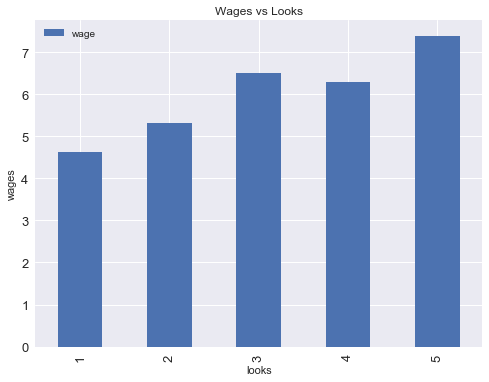

In [10]:
looks.plot(kind='bar', figsize=[8,6], title='Wages vs Looks', fontsize=13)
plt.ylabel('wages')

The change in average wage across all levels of `looks` for males and females both within and outside the service industry are compared. The table below shows two points of significance:
* For males, wages increase with looks in both service and non-service industries. Further, <strong> for males in the service industry, the hourly wage doubles for males rated 5 in `looks`. </strong>
* For females, there seems to be no clear evidence of higher wages associated with better looks. And this holds for females in and outside of the service industry.

These results are evident in the tables below. 

In [11]:
service_looks = pd.pivot_table(data, index= ['female','service','looks'], values= "wage")
service_looks

wage
female service looks           
0      0       1       5.851429
               2       6.280423
               3       7.636250
               4       7.262557
               5       8.385000
       1       1       8.350000
               2       6.118235
               3       7.411111
               4       7.104231
               5      14.026667
1      0       1       1.755000
               2       3.413214
               3       4.010231
               4       3.998608
               5       4.501667
       1       1       2.420000
               2       4.276923
               3       4.457282
               4       5.779649
               5       2.105000

Just comparing average hourly wages across all levels of average education years shows an expected trend - those with higher average education years have higher average hourly wages. This is seen in the table and graph below.

In [12]:
education_wage = pd.pivot_table(data, index = ['educ'], values='wage')
education_wage

,wage
educ,
5,4.587857
8,4.969091
10,5.524295
12,5.698205
13,6.642642
14,5.613529
16,7.792645
17,8.661061


Text(0,0.5,'wages')

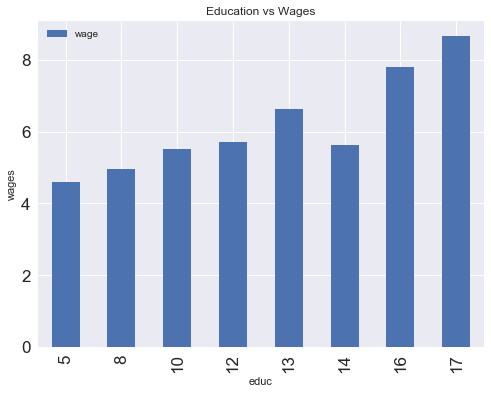

In [13]:
education_wage.plot(kind='bar', figsize=[8,6], title='Education vs Wages', fontsize=17)
plt.ylabel('wages')

## Empirical Analysis


### Current Literature

According to Hamermesh and Biddle (1994), holding labour market and demographic factors constant, attractive people are paid higher than their less attractive counterparts. Using a similar dataset, Hamermesh and Biddle get individuals rated from 1 to 5:

| Looks Rating  | Category      | 
| ------------- |:-------------:| 
| 1             | Homely        | 
| 2             | Below Average |   
| 3             | Average       |    
| 4             | Above Average | 
| 5             | Strikingly Attractive |  

They model looks-based differences in labor-market outcomes and assume that in at least some occupations attractive workers are more productive than unattractive ones. Using three sets of household data, they find some evidence of a positive impact of workers' looks on their earnings. Further, wages of people with below-average looks are lower than those of average-looking workers; and there is a premium in wages for good-looking people that is slightly smaller than this penalty. There is also some evidence that the labor market sorts the best-looking people into occupations where their looks are productive. 

Conversly, in the study by Johnson, Podratz, Dipboyle and Gibbons (2009), the goal is to see if percieved attractiveness benefits the person across various occupations. The “what is beautiful is good” statement implies that attractive people benefit from their looks in perceptions of employment suitability. Conversely, the “beauty is beastly” effect suggests that attractiveness can be detrimental to women in certain employment contexts. They found that attractiveness can be detrimental for women applying for masculine sex-typed jobs for which physical appearance is perceived as unimportant.

Due to the direct results of looks on wages, wage discrimination arises. Liu and Sierminska (2014) find that an important determinant of wage discrimination is the way the labor market rewards physical attractiveness. In their study, they survey the extensive empirical literature of the effect of physical attractiveness on labor market outcomes. The hiring process itself is examined. There are two reasons employers might hire more attractive workers. The first is based on a belief that good-looking workers are more productive or more capable. The second is that employers prefer to work with good-looking workers even when they do not have a biased
belief about the workers actual ability.

Pfann, Biddle, Hamermesh and Bosman state that physically attractive workers are more productive than unattractive ones in some occupations, such as actors, sales assistants and waiters. These occupations involve extensive interaction between workers and customers. This could lead to an advantage during customer discrimination
with customers preferring to interact with better-looking workers. Moreover, physical attractiveness may enhance workers’ ability to engage in productive interaction with co-workers. Good working relationship with co-workers and the firm’s clients can create a form of firm-specific human capital, which generates higher earnings for workers themselves and higher income for their employers.

<strong> Based on all the above studes, the fundamental theory seems to be that beauty affects wages - higher the beauty, better the wages. <\strong>

## Model 1:

The basic model as a benchmark would involve measuring wages with just looks. 

wage = &beta;<sub>0</sub> + &beta;<sub>1</sub>X<sub>i</sub>+ &beta;<sub>2</sub>looks e

All other variables are considered as controls - lwage, belavg, abvavg, exper, union, goodhlth,	black, female, married, south, bigcity,	smllcity, service, expersq, educ, Nservice, Slooks

From the table below, we can see that `looks` = 0.3744. This means that as the the `wage` increases by 1 unit, `looks` increases by 0.37. 

In [90]:
benchmark_model = ols("wage ~ looks", data=data).fit()
benchmark_model_summary = benchmark_model.summary()
benchmark_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.820
Date:                Wed, 28 Mar 2018   Prob (F-statistic):             0.0509
Time:                        15:15:27   Log-Likelihood:                -3724.8
No. Observations:                1260   AIC:                             7454.
Df Residuals:                    1258   BIC:                             7464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1139      0.624      8.192      0.000       3.889       6.339
looks          0.3744      0.192      1.954      0.051      -0.001       0.750
==============================================================================
Omnibus:                     1315.841   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           138827.302
Skew:                           4.789   Prob(JB):                         0.00
Kurtosis:                      53.523   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The correlation coefficient of 0.05 indicates a slightly positive relationship betwen `wage` and `looks`.

In [35]:
data['wage'].corr(data['looks'])

0.05501908986049157

This relationship between hourly wages and looks can be seen from the regression scatterplot below. The slightly upward sloping line shows a very small yet positive relationship between the two variables.

Text(19.565,0.5,'Hourly Wages')

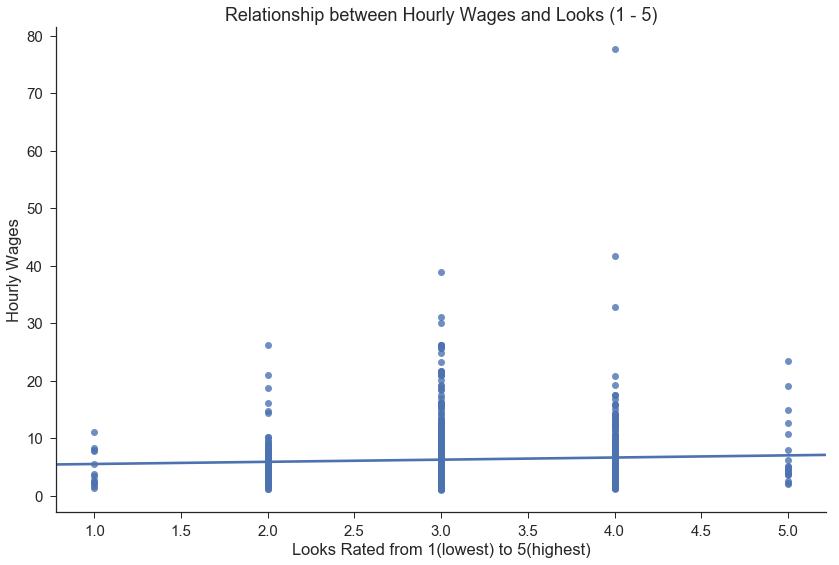

In [98]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="looks", y="wage", size=8, ci=None, data=data, aspect=1.5)

# Plot Labels
plt.title("Relationship between Hourly Wages and Looks (1 - 5)")
plt.xlabel('Looks Rated from 1(lowest) to 5(highest)')
plt.ylabel('Hourly Wages')

## Model 2:

It is seen that there is a positive relationship between wages and looks overall. Based on current studies, we can further consider that looks are more important in relevant industries. The dataset does not have values for each person's occupation, rather if they are in the service industry or not. From what Hamermesh and Biddle (1994) discovered, there should be a higher value on better looking people in the service industry. The linear regression equation is re-created with the `service` variable that is either a 1 or 0 indicaing if the person is in the service industry or not. 

\begin{aligned}
wage = \beta_0 + \beta_1X_i + \beta_2service + \beta_3looks + e
\end{aligned}

All other variables are considered as controls - lwage, belavg, abvavg, exper, union, goodhlth,	black, female, married, south, bigcity,	smllcity, expersq, educ, Nservice, Slooks

From the table below, we can see that while increasing wages by 1 unit, looks will still increase by 0.37. However, increasing the wages by a unit will decrease the probability of being in service  by half. This could mean that the overall wages in the service industry might not be as high as in other industries. One would be more likely to find higher wages in other industries. But within the service industry, those with better looks might still earn.

In [42]:
model_2 = ols("wage ~ looks + service", data=data).fit()
model_2_summary = model_2.summary()
model_2_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.773
Date:                Wed, 28 Mar 2018   Prob (F-statistic):             0.0233
Time:                        14:29:05   Log-Likelihood:                -3722.9
No. Observations:                1260   AIC:                             7452.
Df Residuals:                    1257   BIC:                             7467.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2570      0.628      8.372      0.000       4.025       6.489
looks          0.3782      0.191      1.976      0.048       0.003       0.754
service       -0.5665      0.294     -1.928      0.054      -1.143       0.010
==============================================================================
Omnibus:                     1329.467   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146016.149
Skew:                           4.862   Prob(JB):                         0.00
Kurtosis:                      54.834   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(41.8243,0.5,'Hourly Wages')

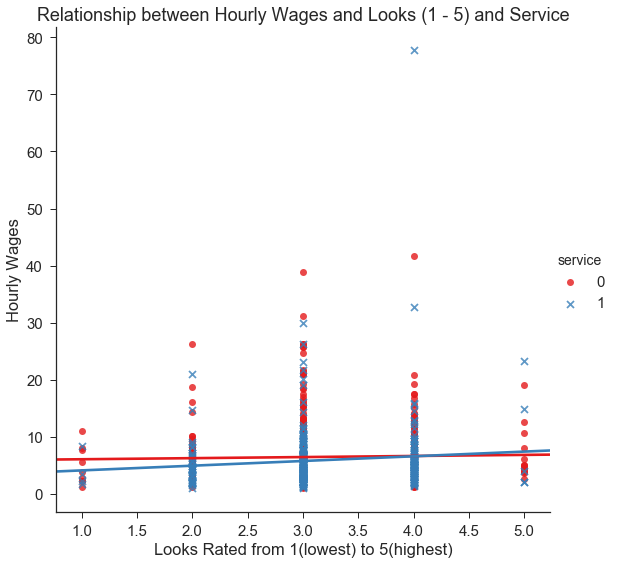

In [91]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="looks", y="wage", hue='service', ci=None, size=8, data=data, aspect=1.0,
              markers=["o", "x"], palette="Set1")

# Plot Labels
plt.title("Relationship between Hourly Wages and Looks (1 - 5) and Service")
plt.xlabel('Looks Rated from 1(lowest) to 5(highest)')
plt.ylabel('Hourly Wages')

## Model 3:

I believe that there might be a difference in the way in which males and females might be rated on their looks that might cause different wages. In other words, I am interested in seeing if men's looks may have a bigger impact on earnings than women. 

\begin{aligned}
wage = \beta_0 +\beta_1X_i + \beta_2looks + \beta_3female + e
\end{aligned}

All other variables are considered as controls - lwage, belavg, abvavg, exper, union, goodhlth,	black, service, married, south, bigcity,	smllcity, expersq, educ, Nservice, Slooks


From the regression results we see that there is a negative relationship between being female and wage increase. Further, the graph below shows the distribution of males and females across looks and their corresponding wages. The red dots represent females and the blue dots represent the males. The distribution of the blue versus red dots show males receiving higher wages than females (apart from one outlier). But there still seems to be no clear indication that males with higher looks are rewarded more than their female counterparts apart from the slightly upward line.

In [93]:
model_3 = ols("wage ~ looks + female", data=data).fit()
model_3_summary = model_3.summary()
model_3_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     71.29
Date:                Wed, 28 Mar 2018   Prob (F-statistic):           4.69e-30
Time:                        15:37:31   Log-Likelihood:                -3659.0
No. Observations:                1260   AIC:                             7324.
Df Residuals:                    1257   BIC:                             7339.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0628      0.598     10.135      0.000       4.889       7.236
looks          0.4111      0.182      2.259      0.024       0.054       0.768
female        -3.0796      0.262    -11.762      0.000      -3.593      -2.566
==============================================================================
Omnibus:                     1450.697   Durbin-Watson:                   0.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           242246.721
Skew:                           5.514   Prob(JB):                         0.00
Kurtosis:                      70.027   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(39.3629,0.5,'Hourly Wages')

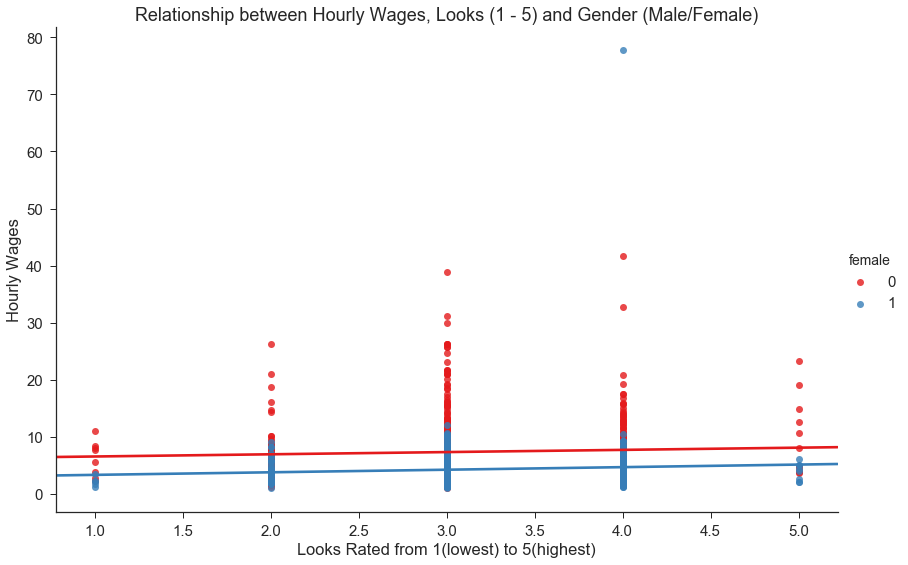

In [106]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="looks", y="wage", hue ='female', size=8, ci=None, data=data, aspect=1.5, palette='Set1')

# Plot Labels
plt.title("Relationship between Hourly Wages, Looks (1 - 5) and Gender (Male/Female)")
plt.xlabel('Looks Rated from 1(lowest) to 5(highest)')
plt.ylabel('Hourly Wages')

## Other Model :

Another point that was made in the previous studies was that good-looking people self select beauty and hospitality industries. To check if this holds in the dataset, I would also like to understand if there is a relationship between looks and occupation. In this case, would better looking people choose to go to a service industry or not.

\begin{aligned}
looks = \beta_0 +\beta_1X_i +\beta_2service + e
\end{aligned}


All other variables are considered as controls - lwage, belavg, abvavg, exper, union, goodhlth,	black, wages, married, south, bigcity,	smllcity, expersq, educ, Nservice, Slooks


From the regression results, it seems that as `looks` = 0.0067, there is little evidence to show that better looking people are self selecting the service industry. Further, there is a very small positive relationship between `looks` and `service industry` due to the correlation coeffecient of 0.01. The graph adds to this result. Each point on the graph represents a person who is either in the service industry or not. There is a fairly even distribution of points here.

In [46]:
data['looks'].corr(data['service'])

0.01021348890251193

In [107]:
other_model = ols("service ~ looks", data=data).fit()
other_model_summary = other_model.summary()
other_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                service   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1312
Date:                Wed, 28 Mar 2018   Prob (F-statistic):              0.717
Time:                        15:48:25   Log-Likelihood:                -770.18
No. Observations:                1260   AIC:                             1544.
Df Residuals:                    1258   BIC:                             1555.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2526      0.060      4.222      0.000       0.135       0.370
looks          0.0067      0.018      0.362      0.717      -0.029       0.043
==============================================================================
Omnibus:                      389.419   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.528
Skew:                           1.014   Prob(JB):                     2.19e-58
Kurtosis:                       2.029   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,0,'Service Industry')

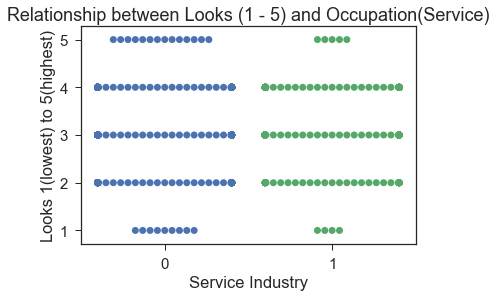

In [108]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.swarmplot(x="service", y="looks", size = 7, data=data)

# Plot Labels
plt.title("Relationship between Looks (1 - 5) and Occupation(Service)")
plt.ylabel('Looks 1(lowest) to 5(highest)')
plt.xlabel('Service Industry')

# Conclusions:

The model:

\begin{aligned}
wage = \beta_0  +\beta_1X_i +\beta_2female + \beta_3looks + e
\end{aligned}

is not completely adequate. It is possibe that there may be some non-linearity in the model. 

For example:
\begin{aligned}
wage = \beta_0 + \beta_1X_i +\beta_2female + \beta_3looks +\beta_4looks.female + e
\end{aligned}

There seems to be no heteroskedasticity in the model that we choose.
The p-value from the Breusch-Pagan Test is 0.35. Considering a significance level of 0.05, as: 

\begin{aligned}
p-value > 0.05
\end{aligned}

As a large p-value indicates weak evidence against the hypothesis, we can accept the null hypothesis ie beauty influences a person's economic success.

In [123]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
bp_test = sms.het_breuschpagan(residuals,model_3.model.exog)
list(zip(name, bp_test))[1]

('p-value', 0.3563751281708458)

To conclude, all other factors held constant, the analysis conducted so far indicates that beauty does influence wages (model 1). While the wages in the servvice industry might not be as high as the other occupations but within the service industry, those with better looks earn more (model 2). Next, while men are clearly earning more than females in this dataset, there is no clear indication that men with better looks earn more than women with better looks (model 3). Finally, there seems to be no clear evidence that people with better looks self-sorted into the service industry (other model)

The possible factors affecting these results could be the fact that the dataset contains double number of males than females. Next, there could be bias in the ratings given to males and females. Further, it is known that productivity affects wages (Hamermesh and Biddle 1994) but there is no information on productivity of the people earning higher wages. This could be affecting wages independent of looks. Also, the service industry is too broad. It could be narrowed down to specific occupations like acting and modeling to understand these effects again. Also this dataset was collected in the 19xx's in America. It could be possible that time and culture could distort these results. Finally, employee discrimination could affect the wages being recieved and there is no informtion about that in this dataset.

In the future, an extension of this research could be made to include data from various countries across the different continents. The dataset could be extended to include occupations instead of just measuring service industry. Employer discrimination could influence how employees are selected and how well they are paid. A separate study to measure employee discrimination could be measured (Liu and Sierminska 2014, 4). Finally, beauty is not straightforward. In service based industries while we see that beauty matters, it is also important to note that personality matters too. There is no measure of personality in this dataset but looks combined with personality would overall influence wages and employability. 

### References:

Johnson, Stefanie K., Kenneth E. Podratz, Robert L. Dipboye, and Ellie Gibbons. "Physical Attractiveness Biases in    Ratings of Employment Suitability: Tracking Down the “Beauty Is Beastly” Effect." The Journal of Social            Psychology 150, no. 3 (2010): 301-18. doi:10.1080/00224540903365414.
Meghir, Costas, and Christian Dustmann. "Wages, Experience and Seniority." Working Paper Series, 2001.   
    doi:10.1920/wp.ifs.2001.0101.
Hamermesh, Daniel, and Jeff Biddle. "Beauty and the Labor Market." 1993. doi:10.3386/w4518.
    Samper, Adriana, Linyun W. Yang, and Michelle E. Daniels. "Beauty, Effort, and Misrepresentation: How Beauty 
    Work   Affects Judgments of Moral Character and Consumer Preferences." Journal of Consumer Research, 2017. 
    doi:10.1093/jcr/ucx116.
Liu, Xing, and Eva Sierminska. "Evaluating the Effect of Beauty on Labor Market Outcomes: A Review of the 
    Literature." SSRN Electronic Journal, 2014. doi:10.2139/ssrn.2613431.
Gerard A Pfann, Jeff E Biddle, Daniel S Hamermesh, and Ciska M Bosman. Business success and businesses’ beauty 
    capital. Economics Letters, 67(2):201–207, 2000.